Landslides, also known as landslips are several forms of mass wasting that may include a wide range of ground movements, such as rockfalls, mudflows, shallow or deep-seated slope failures and debris flows.Landslides occur in a variety of environments, characterized by either steep or gentle slope gradients, from mountain ranges to coastal cliffs or even underwater, in which case they are called submarine landslides.

Hong Kong, one of the hilliest and most densely populated cities in the world, is frequently hit by extreme rainfall and is therefore highly susceptible to rain-induced landslides. A landslide is the movement of masses of rock, debris, or earth down a slope and can result in significant loss of life and property. A high-quality landslide inventory is essential not only for landslide hazard and risk analysis but also for supporting agency decisions on landslide hazard mitigation and prevention.

The common practice of identifying landslides is visual interpretation which, however, is labor-intensive and time-consuming. Thus, this hack will focus on automating the landslide identification process using artificial intelligence techniques, and target at using high-resolution terrain information to perform the terrain-based landslide identification.

The objective of this hackathon is to classify if a landslide occured or not.

In [53]:
# Import libraries here


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle


pd.set_option('display.max_columns', None)

#### Importing the training data and inspecting it
Data inspection is important. It helps us identify outliers, missing values, or any other errors that might affect the model performance

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.26439,37.29208,33.85452,35.79576,40.31554,38.87666,39.50971,40.51059,45.83452,45.00000,36.05503,40.51059,44.56372,41.81031,38.87666,33.85452,38.87666,33.85452,33.85452,32.63194,32.63194,30.24626,30.24626,30.24626,30.24626,98.1301,113.1986,116.5650,123.6901,135.0000,97.12502,104.0362,110.5560,119.0546,126.8699,105.9454,110.5560,113.9625,116.5650,119.7449,116.5650,119.7449,116.5650,116.5650,128.6598,128.6598,120.9638,120.9638,120.9638,120.9638,0.038514,0.029463,0.031405,0.025771,0.010453,0.028321,0.027360,0.019831,0.009338,0.008806,0.021451,0.021244,0.017273,0.006708,-0.008671,0.023851,0.012586,-0.004249,0.003646,-0.006809,0.013328,0.005337,0.007039,-0.017753,-0.007777,0.013903,0.014674,0.018249,0.018368,0.003341,0.002023,0.005743,0.002238,-0.003820,-0.003302,-0.002141,0.003585,0.002025,-0.012269,-0.027184,0.000977,-0.012630,-0.031644,-0.025683,-0.037371,-0.018934,-0.021875,-0.023553,-0.048495,-0.039092,8.045186,8.333038,7.819405,8.032228,9.818933,9.295772,9.375107,9.499450,10.922910,11.001900,9.339861,9.883230,11.035840,10.298030,9.618946,8.703197,10.175750,8.651121,8.251134,8.074524,8.519887,7.989215,7.634287,7.804186,7.219216,3.173340,2.961406,3.315935,3.061250,3.246914,3.221661,3.153512,3.048637,2.915506,3.073973,3.765278,3.246664,3.154479,3.237765,3.392537,3.851345,3.673898,3.821337,3.584646,3.734637,4.003083,4.218082,3.990867,4.100921,3.715154,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1.281767,1.281743,1.281708,1.281684,1.281649,1.281780,1.281757,1.281721,1.281698,1.281662,1.281789,1.281765,1.281730,1.281707,1.281671,1.281802,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281

In [4]:
train.shape

(10864, 227)

In [5]:
train.isna().sum()

Sample_ID      0
1_elevation    0
2_elevation    0
3_elevation    0
4_elevation    0
              ..
22_sdoif       0
23_sdoif       0
24_sdoif       0
25_sdoif       0
Label          0
Length: 227, dtype: int64

In [6]:
train.duplicated().any()

False

In [7]:
# do some statistics
train.describe()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,1086

In [8]:
elevation_columns=[col for col in train.columns if "elevation" in col]

In [9]:
# let me check the correlations from the same category

In [10]:
train[elevation_columns].corr()

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation
1_elevation,1.000000,0.999903,0.999628,0.999192,0.998631,0.999901,0.999806,0.999531,0.999084,0.998510,0.999632,0.999528,0.999247,0.998805,0.998238,0.999221,0.999105,0.998824,0.998393,0.997845,0.998694,0.998568,0.998293,0.997881,0.997346
2_elevation,0.999903,1.000000,0.999897,0.999611,0.999183,0.999814,0.999898,0.999796,0.999504,0.999066,0.999555,0.999618,0.999502,0.999216,0.998789,0.999156,0.999196,0.999071,0.998793,0.998385,0.998641,0.998664,0.998538,0.998273,0.997875
3_elevation,0.999628,0.999897,1.000000,0.999894,0.999615,0.999549,0.999804,0.999895,0.999785,0.999500,0.999309,0.999534,0.999598,0.999487,0.999215,0.998928,0.999124,0.999165,0.999052,0.998799,0.998429,0.998602,0.998633,0.998524,0.998275
4_elevation,0.999192,0.999611,0.999894,1.000000,0.999899,0.999124,0.999530,0.999803,0.999895,0.999789,0.998904,0.999282,0.999520,0.999597,0.999498,0.998545,0.998893,0.999100,0.999161,0.999073,0.998068,0.998391,0.998580,0.998634,0.998542
5_elevation,0.998631,0.999183,0.999615,0.999899,1.000000,0.998578,0.999118,0.999544,0.999816,0.999899,0.998379,0.998895,0.999288,0.999538,0.999614,0.998045,0.998531,0.998890,0.999116,0.999191,0.997593,0.998054,0.998391,0.998599,0.998662
6_elevation,0.999901,0.999814,0.999549,0.999124,0.998578,1.000000,0.999903,0.999626,0.999180,0.998610,0.999900,0.999799,0.999516,0.999067,0.998493,0.999634,0.999523,0.999242,0.998803,0.998244,0.999235,0.999115,0.998841,0.998423,0.997877
7_elevation,0.999806,0.999898,0.999804,0.999530,0.999118,0.999903,1.000000,0.999895,0.999600,0.999162,0.999817,0.999896,0.999784,0.999488,0.999050,0.999566,0.999621,0.999503,0.999217,0.998797,0.999182,0.999218,0.999098,0.998829,0.998421
8_elevation,0.999531,0.999796,0.999895,0.999803,0.999544,0.999626,0.999895,1.000000,0.999890,0.999605,0.999554,0.999805,0.999888,0.999778,0.999495,0.999325,0.999546,0.999606,0.999496,0.999231,0.998963,0.999158,0.999204,0.999098,0.998843
9_elevation,0.999084,0.999504,0.999785,0.999895,0.999816,0.999180,0.999600,0.999890,1.000000,0.999897,0.999121,0.999524,0.999792,0.999887,0.999787,0.998912,0.999288,0.999523,0.999602,0.999512,0.998574,0.998922,0.999135,0.999202,0.999113
10_elevation,0.998510,0.999066,0.999500,0.999789,0.999899,0.998610,0.999162,0.999605,0.999897,1.000000,0.998564,0.999101,0.999524,0.999801,0.999893,0.998375,0.998889,0.999278,0.999529,0.999617,0.998060,0.998548,0.998911,0.999141,0.999215


In [11]:
sdoif_columns=[col for col in train.columns if "sdoif" in col]

In [12]:
train[sdoif_columns].corr()

,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
1_sdoif,1.000000,0.999999,0.999998,0.999996,0.999994,0.999998,0.999999,0.999998,0.999996,0.999994,0.999996,0.999996,0.999997,0.999996,0.999994,0.999993,0.999993,0.999993,0.999993,0.999992,0.999987,0.999989,0.999989,0.999989,0.999988
2_sdoif,0.999999,1.000000,0.999999,0.999998,0.999996,0.999997,0.999999,0.999999,0.999998,0.999996,0.999995,0.999996,0.999997,0.999996,0.999995,0.999991,0.999993,0.999993,0.999993,0.999993,0.999986,0.999988,0.999989,0.999989,0.999989
3_sdoif,0.999998,0.999999,1.000000,0.999999,0.999998,0.999996,0.999998,0.999999,0.999999,0.999998,0.999993,0.999995,0.999996,0.999997,0.999996,0.999989,0.999991,0.999992,0.999993,0.999994,0.999983,0.999986,0.999987,0.999989,0.999989
4_sdoif,0.999996,0.999998,0.999999,1.000000,0.999999,0.999993,0.999996,0.999998,0.999999,0.999999,0.999991,0.999993,0.999995,0.999997,0.999997,0.999987,0.999989,0.999991,0.999992,0.999994,0.999980,0.999984,0.999986,0.999988,0.999988
5_sdoif,0.999994,0.999996,0.999998,0.999999,1.000000,0.999991,0.999994,0.999996,0.999998,0.999999,0.999988,0.999991,0.999994,0.999996,0.999997,0.999983,0.999987,0.999989,0.999991,0.999993,0.999977,0.999981,0.999984,0.999986,0.999987
6_sdoif,0.999998,0.999997,0.999996,0.999993,0.999991,1.000000,0.999998,0.999997,0.999995,0.999993,0.999999,0.999999,0.999997,0.999995,0.999993,0.999997,0.999997,0.999996,0.999995,0.999993,0.999993,0.999994,0.999994,0.999993,0.999991
7_sdoif,0.999999,0.999999,0.999998,0.999996,0.999994,0.999998,1.000000,0.999999,0.999998,0.999996,0.999997,0.999998,0.999999,0.999998,0.999996,0.999995,0.999996,0.999996,0.999996,0.999995,0.999991,0.999992,0.999993,0.999993,0.999992
8_sdoif,0.999998,0.999999,0.999999,0.999998,0.999996,0.999997,0.999999,1.000000,0.999999,0.999998,0.999996,0.999998,0.999999,0.999999,0.999998,0.999994,0.999995,0.999996,0.999997,0.999996,0.999989,0.999991,0.999992,0.999993,0.999993
9_sdoif,0.999996,0.999998,0.999999,0.999999,0.999998,0.999995,0.999998,0.999999,1.000000,0.999999,0.999994,0.999996,0.999998,0.999999,0.999999,0.999991,0.999993,0.999995,0.999996,0.999997,0.999986,0.999989,0.999991,0.999992,0.999993
10_sdoif,0.999994,0.999996,0.999998,0.999999,0.999999,0.999993,0.999996,0.999998,0.999999,1.000000,0.999991,0.999994,0.999996,0.999998,0.999999,0.999988,0.999991,0.999993,0.999995,0.999997,0.999983,0.999986,0.999989,0.999991,0.999992


After data exploration, I noticed that features in the same category are highly correlated. Besides that there wer no major issues in the data that could affect performance

Since this is a classification problem, it is important to check the class balance. A highly imbalanced target column will affect the performance of the model, and the results by the model will be inaccurate.

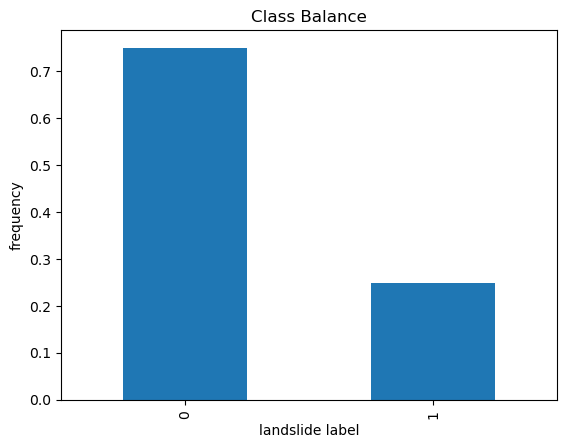

In [14]:
# let me check the distriution in the target column
# Plot class balance
train['Label'].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="landslide label",
    ylabel="frequency",
    title="Class Balance"
);

The target column is highly imbalanced. I will perform a resampling on it later on.

##### Model training

In [15]:
# Split the training and test sets
target='Label'
X= train.drop(columns=[target,'Sample_ID'])
y=train[target]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8691, 225)
y_train shape: (8691,)
X_test shape: (2173, 225)
y_test shape: (2173,)


##### baseline accuracy

In [18]:
### Baseline accuracy
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

# The baseline accuracy score  is at 75% let me introduce other models and see how they compare with it

Baseline Accuracy: 0.7515


##### Iteration and introducing of other models

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression, Accuracy Score: 0.8012
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1617
           1       0.67      0.44      0.53       556

    accuracy                           0.80      2173
   macro avg       0.75      0.68      0.70      2173
weighted avg       0.79      0.80      0.79      2173



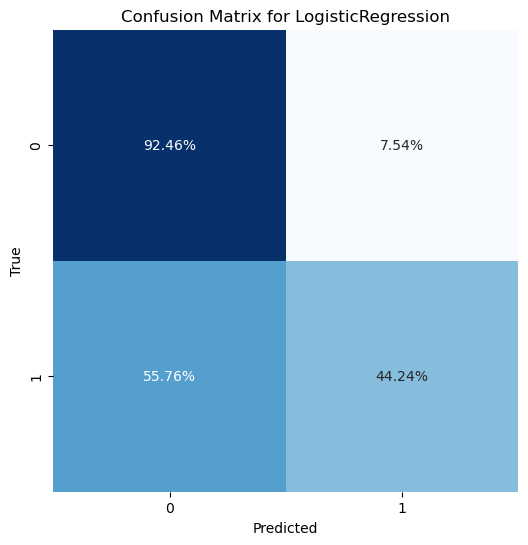

Model: RandomForestClassifier, Accuracy Score: 0.8541
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1617
           1       0.81      0.56      0.66       556

    accuracy                           0.85      2173
   macro avg       0.84      0.76      0.79      2173
weighted avg       0.85      0.85      0.84      2173



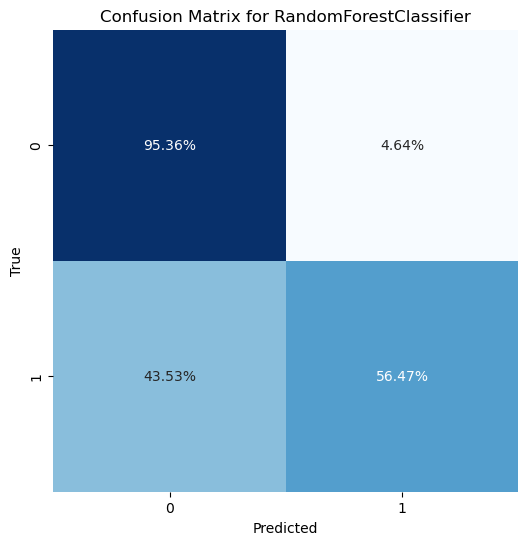

Model: DecisionTreeClassifier, Accuracy Score: 0.7616
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1617
           1       0.53      0.56      0.54       556

    accuracy                           0.76      2173
   macro avg       0.69      0.69      0.69      2173
weighted avg       0.77      0.76      0.76      2173



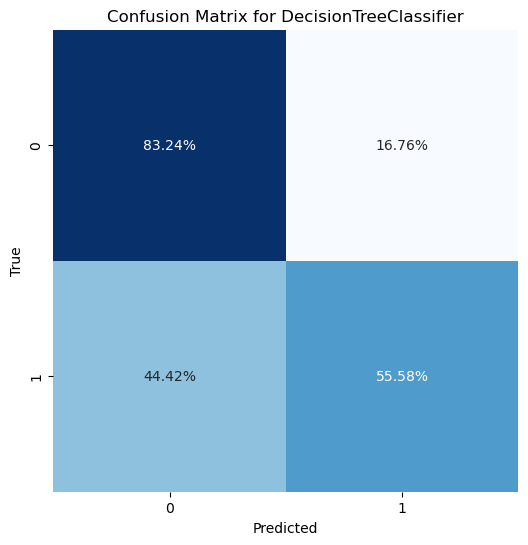

Model: KNeighborsClassifier, Accuracy Score: 0.7469
Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1617
           1       0.51      0.40      0.44       556

    accuracy                           0.75      2173
   macro avg       0.66      0.63      0.64      2173
weighted avg       0.73      0.75      0.74      2173



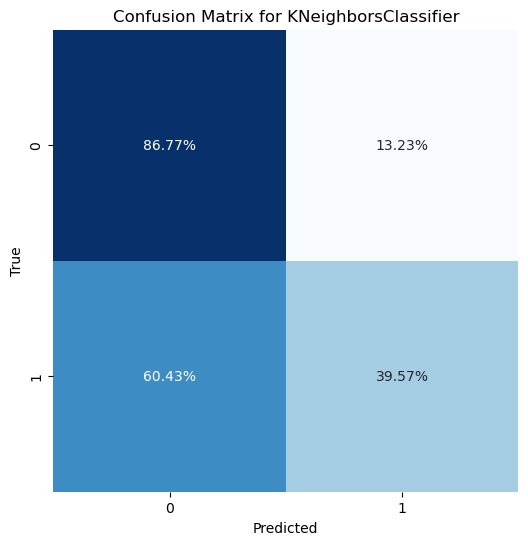

In [19]:
# Instantiate the models

lr = LogisticRegression(max_iter=1000)
rc = RandomForestClassifier()
dc = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

models = [lr, rc, dc,knn]
accuracy = []
model_names = []


# Loop through each model for training and evaluation
for model in models:
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

   # Calculate and store the accuracy of the model
    accuracy.append(round(accuracy_score(y_test, y_pred), 4))
    model_names.append(type(model).__name__)
    print(f'Model: {type(model).__name__}, Accuracy Score: {round(accuracy_score(y_test, y_pred), 4)}')

    # Print classification report
    report = classification_report(y_test, y_pred)
    print(f'Classification Report for {type(model).__name__}:\n{report}')

# # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred,normalize='true')

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()


 Random forest seems to be outperforming the other models plus the baseline. 


### Resampling
There are various way to resample your data.\
You can use SMOTE, randomoversampler,randomundersampler\
All of them have their advantanges and disadvantanges\
I decided to try randomoversampler in this project

It is always recommended to resample on the training data to avoid any leakages/


##### Resampling using the random forest classifier

In [21]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)

In [22]:
X_train_over_1, X_test_over_1, y_train_over_1, y_test_over_1 = train_test_split(
    X_train_over, y_train_over, test_size=0.2, random_state=42
)

In [23]:
# Initiate random forest classifier again
rc_1=RandomForestClassifier()

In [32]:
rc_1.fit(X_train_over_1,y_train_over_1)

RandomForestClassifier()

In [33]:
y_rc_pred=rc_1.predict(X_test_over_1)

In [34]:
print(accuracy_score(y_test_over_1, y_rc_pred), 4)

0.9337925755836204 4


After performing a resampling we see that the accuracy has increased to 93%\
What are some other ways to improve the performance of your model?hyperparameter tuning using gridsearch

##### hyperparamter tuning with gridsearch cv

In [36]:
# let me try some hypaperameter tuning
params = {
    "n_estimators":range(25,100,25),
    "max_depth":range(10,50,10)
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 50, 10)}

In [37]:
model = GridSearchCV(rc_1,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [38]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [39]:
best_params = model.best_params_
print(best_params)

{'max_depth': 30, 'n_estimators': 50}


In [40]:
rc_1=RandomForestClassifier(max_depth=30,n_estimators=50)

In [41]:
rc_1.fit(X_train_over_1,y_train_over_1)

RandomForestClassifier(max_depth=30, n_estimators=50)

In [42]:
y_rc_pred=rc_1.predict(X_test_over_1)

In [43]:
print(accuracy_score(y_test_over_1, y_rc_pred), 4)

0.9272866437045542 4


Classification Report               precision    recall  f1-score   support

           0       0.96      0.90      0.92      1305
           1       0.90      0.96      0.93      1308

    accuracy                           0.93      2613
   macro avg       0.93      0.93      0.93      2613
weighted avg       0.93      0.93      0.93      2613



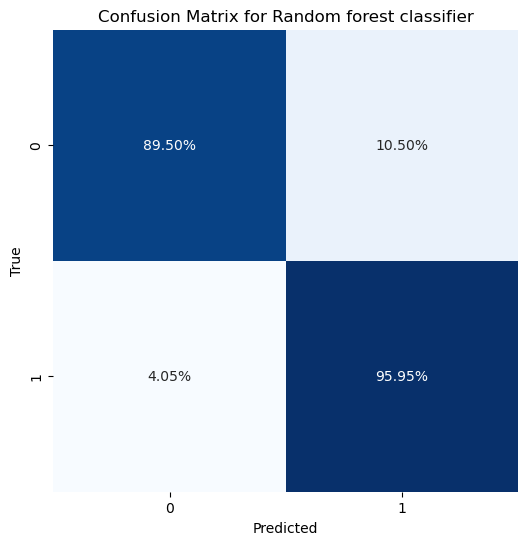

In [44]:
# check confusion matricx and classification report

# Print classification report
report = classification_report(y_test_over_1, y_rc_pred)
print(f'Classification Report {report}')

# # Compute confusion matrix
cm = confusion_matrix(y_test_over_1, y_rc_pred,normalize='true')

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False,
            xticklabels=rc_1.classes_, yticklabels=rc_1.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Random forest classifier')
plt.show()

The model performs better with all the modification

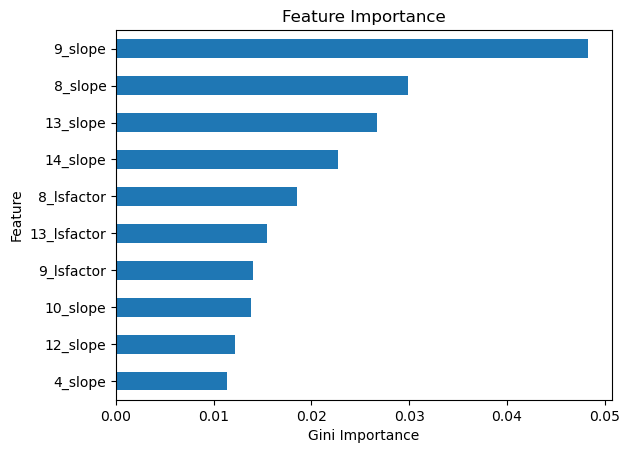

In [48]:
# check the feature importance
# Get feature names from training data
features= X_train_over.columns
# Extract importances from model
importances=model.best_estimator_.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [50]:
df = pd.DataFrame(data={"Actual Values": y_test_over_1, "Predictions": y_rc_pred})
pd.options.display.float_format = '{:.2f}'.format
df.head()

,Actual Values,Predictions
2760,0,0
5259,1,1
3562,0,0
5965,0,0
9934,1,1


##### save the model and use it on the test data

In [54]:
with open('model-5-2.pkl','wb') as f:
    pickle.dump(rc_1,f)

In [55]:
with open("model-5-2.pkl", "rb") as f:
    loaded_model = pickle.load(f)
print(loaded_model)

RandomForestClassifier(max_depth=30, n_estimators=50)


In [56]:
# load the test data
test=pd.read_csv("Test.csv")

In [61]:
test.head()

,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
0,111,109,109,110,112,117,114,113,112,113,120,120,118,116,115,122,122,122,121,120,122,122,121,121,123,45.83,36.06,27.02,22.99,27.02,43.49,49.49,42.67,30.96,22.99,27.02,39.51,44.56,43.49,35.26,12.60,11.31,17.55,28.30,38.88,5.71,5.71,8.05,12.60,26.57,240.95,254.05,281.31,315.00,348.69,251.56,250.02,257.47,270.00,315.00,281.31,255.96,246.04,251.56,278.13,296.57,270.00,251.56,248.20,277.12,360.00,180.00,135.00,333.43,306.87,0.04,-0.01,-0.04,-0.06,-0.06,0.03,0.00,-0.04,-0.05,-0.04,0.03,0.01,-0.03,-0.05,-0.03,0.06,0.01,-0.01,-0.03,-0.03,0.09,0.08,0.02,-0.00,-0.01,-0.02,-0.04,-0.04,-0.05,-0.04,0.01,0.00,-0.01,-0.01,-0.01,0.03,0.02,-0.01,-0.02,-0.02,0.07,0.06,0.04,0.02,-0.00,0.02,0.04,0.06,0.04,0.02,9.67,8.18,7.78,8.78,10.95,8.90,11.26,10.23,10.28,8.03,5.09,8.14,10.00,11.46,9.75,1.72,1.83,4.35,5.78,10.84,0.66,0.00,0.00,0.85,4.82,2.68,4.81,6.25,6.67,6.60,2.24,2.56,3.07,5.31,6.22,2.77,2.45,2.66,3.10,4.13,2.93,4.04,3.53,2.14,4.03,4.08,8.52,9.86,5.31,3.32,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31
1,189,187,186,185,185,187,186,184,183,183,187,185,184,182,182,187,186,184,182,181,188,186,184,182,181,26.57,26.57,28.30,27.02,22.41,19.83,19.83,19.83,17.55,17.55,16.70,16.70,16.70,12.60,12.60,17.55,17.55,21.80,16.70,12.60,16.70,22.41,22.41,16.70,11.31,126.87,126.87,111.80,101.31,104.04,146.31,146.31,146.31,108.44,108.44,180.00,180.00,180.00,153.44,116.56,198.44,198.44,180.00,180.00,153.44,180.00,165.96,165.96,180.00,180.00,-0.02,-0.01,-0.01,-0.00,-0.00,-0.03,-0.02,-0.02,-0.02,0.00,-0.03,-0.04,-0.02,-0.02,-0.02,-0.02,-0.03,-0.03,-0.03,-0.02,-0.01,-0.01,-0.02,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.02,-0.0

In [60]:
test.drop(columns="Sample_ID",inplace=True)

In [63]:
test_pred=loaded_model.predict(test)

In [64]:
test_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)